<a href="https://colab.research.google.com/github/Anantbir-S/AER850_Project2/blob/main/better.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 1740s 26s/step - accuracy: 0.3792 - loss: 65.0879 - val_accuracy: 0.4037 - val_loss: 10.4042 - learning_rate: 3.0000e-04
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.4132 - loss: 13.0644 - val_accuracy: 0.4014 - val_loss: 8.4207 - learning_rate: 3.0000e-04
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.3792 - loss: 8.0755 - val_accuracy: 0.4153 - val_loss: 7.0190 - learning_rate: 3.0000e-04
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.4180 - loss: 6.7088 - val_accuracy: 0.4176 - val_loss: 5.8963 - learning_rate: 3.0000e-04
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.4252 - loss: 5.7282 - val_accuracy: 0.3968 - val_loss: 5.1043 - learning_rate: 3.0000e-04
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.4123 - loss: 5.0028 - val_accuracy: 0.4176 - val_loss: 4.5522 - learning_rate: 2.7145e-04
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.4001 - loss

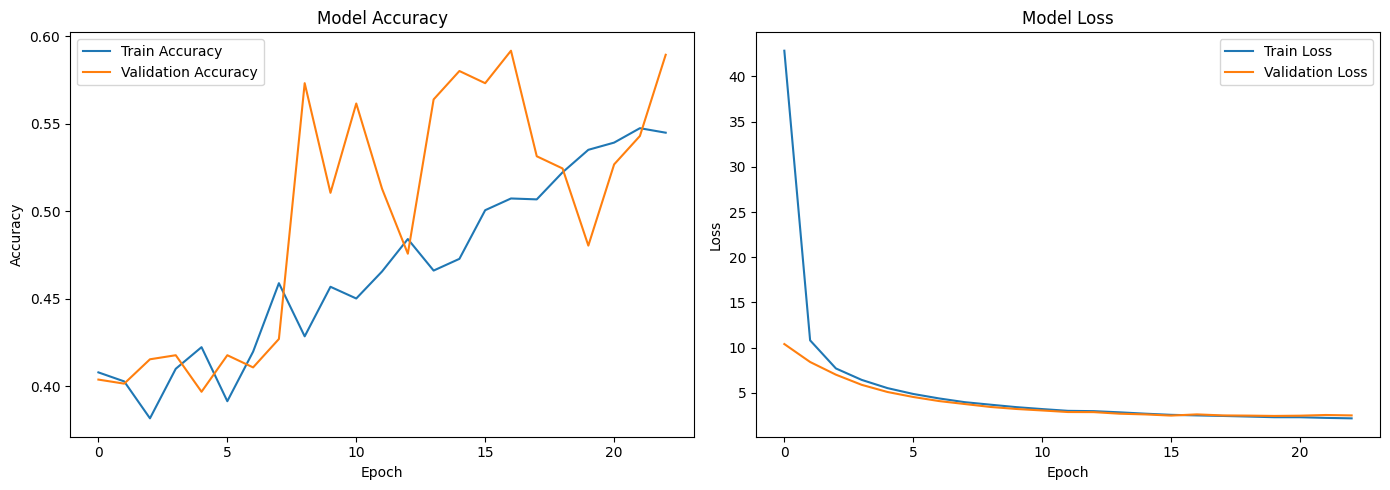

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import matplotlib.pyplot as plt
from google.colab import drive
import os


# Mount Google Drive (if necessary)
drive.mount('/content/drive')

# Define image dimensions
input_image_shape = (500, 500, 3)

base_dir = '/content/drive/MyDrive/Project 2 Data/Data'

# Set up paths for train, validation, and test directories
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Enhanced data augmentation with more transformations to reduce overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

# Validation data generator with rescaling only
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create image data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(500, 500),
    batch_size=32,  # Reduced batch size
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(500, 500),
    batch_size=32,
    class_mode='categorical'
)

# Define the CNN model with increased dropout and regularization
model = Sequential([
    Input(shape=input_image_shape),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.2),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Second Convolutional Block
    Conv2D(64, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.2),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Third Convolutional Block
    Conv2D(128, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.2),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Fourth Convolutional Block
    Conv2D(256, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.2),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.7),  # Higher dropout for fully connected layer

    # Output Layer
    Dense(3, activation='softmax')
])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

lr_scheduler = LearningRateScheduler(scheduler)

# Compile the model with a lower initial learning rate
model.compile(optimizer=Adam(learning_rate=0.0003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,  # Increased epochs to allow for gradual training
    callbacks=[lr_scheduler, early_stopping, reduce_lr]
)

# Plot training and validation accuracy/loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()



